In [14]:
import pandas as pd#it is used for data manipulation
import matplotlib.pyplot as plt#it is used for visualizations

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns#it is used for visualizations
import numpy as np#it is used for numerical operations
# Load patient data
data = pd.read_csv('/content/hospital_datas.csv')#loads the hospital data csv file into a dataframe called data






<ipython-input-14-529270263>:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/hospital_datas.csv')#loads the hospital data csv file into a dataframe called data


In [15]:
# Calculate length of stay
data['admission_date'] = pd.to_datetime(data['admission_date'])#converts the data columns from string to actual datetime objects for arithmetic operations
data['discharge_date'] = pd.to_datetime(data['discharge_date'])#converts the data columns from string to actual datetime objects for arithmetic operations
data['length_of_stay'] = (data['discharge_date'] - data['admission_date']).dt.days #calculates length of stay in days for each patient by subtracting the two dates
print(data['length_of_stay'])#display the new length_of_stay column

0        2
1        2
2        2
3        2
4        2
        ..
99995    2
99996    2
99997    2
99998    2
99999    2
Name: length_of_stay, Length: 100000, dtype: int64


In [6]:
# Calculate average length of stay(overall and by ward)
avg_length_of_stay = data['length_of_stay'].mean()#computes and prints the average number of days all patients stayed
print(f'Average length of stay: {avg_length_of_stay} days')


Average length of stay: 2.0 days


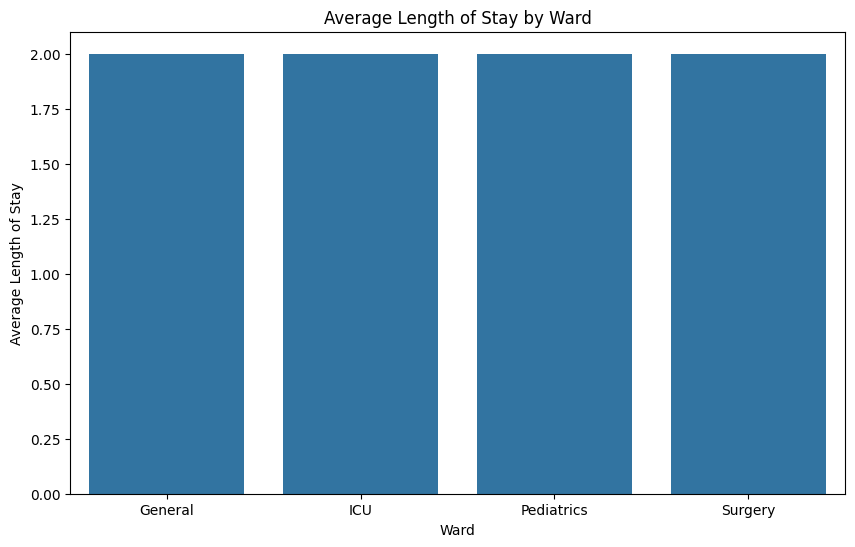

In [8]:
# Plot average length of stay by ward
#creates a bar chart showing the average length of stay per ward using seaborn
plt.figure(figsize=(10,6))

# Calculate average length of stay by ward and store in a DataFrame
avg_length_of_stay_by_ward = data.groupby('ward')['length_of_stay'].mean().reset_index()

sns.barplot(x='ward', y='length_of_stay', data=avg_length_of_stay_by_ward)
plt.title('Average Length of Stay by Ward')
plt.xlabel('Ward')
plt.ylabel('Average Length of Stay')
plt.show()

In [9]:
# Calculate bed occupancy by ward
data['bed_days_used'] = data['length_of_stay']#creates a new column that duplicates length of stay to represent bed-days used
bed_occupancy = data.groupby('ward')['bed_days_used'].sum().reset_index()#sums all bed-days used in each ward
total_beds = data['ward'].value_counts().max() # assuming total beds = max ward capacity assuming the max count of patients in any ward represents the total number of beds available
bed_occupancy['bed_occupancy_rate'] = bed_occupancy['bed_days_used'] / (total_beds * data['length_of_stay'].mean())#formula for occupancy rate=actual bed-days used/(total beds x average length of stay)
print(bed_occupancy['bed_occupancy_rate'])#shows calculated bed occupancy rates per ward


0    0.851852
1    0.851852
2    1.000000
3    1.000000
Name: bed_occupancy_rate, dtype: float64


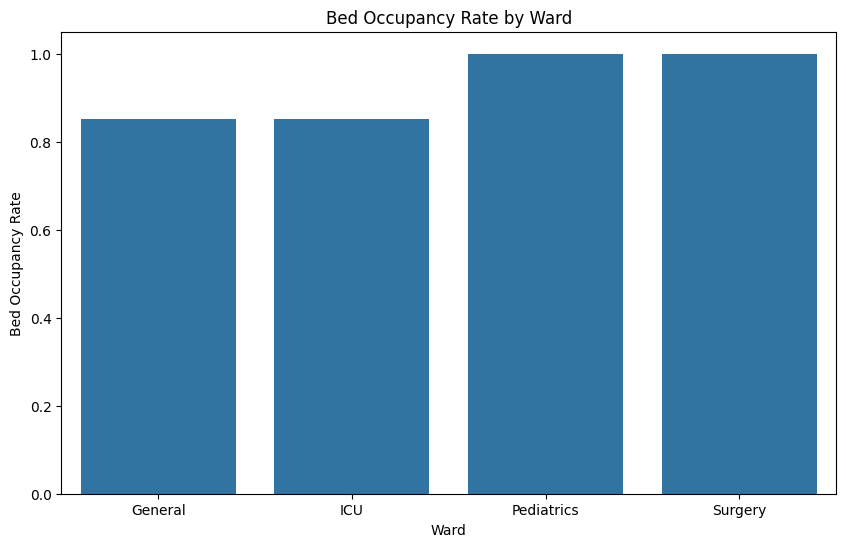

In [10]:
# Plot bed occupancy rate by ward in barplot format
#bar plot showing bed occupancy rate per ward
plt.figure(figsize=(10,6))
sns.barplot(x='ward', y='bed_occupancy_rate', data=bed_occupancy)
plt.title('Bed Occupancy Rate by Ward')
plt.xlabel('Ward')
plt.ylabel('Bed Occupancy Rate')
plt.show()

<Figure size 1000x600 with 0 Axes>

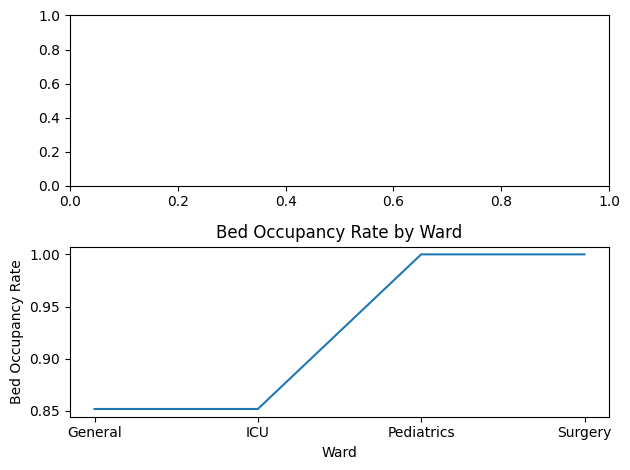

In [11]:
# Plot bed occupancy rate by ward in lineplot format
#line plot version to visualize trends or patterns in occupancy rate across wards
plt.figure(figsize=(10,6))
fig, ax = plt.subplots(2, 1,)
sns.lineplot(x='ward', y='bed_occupancy_rate', data=bed_occupancy, ax=ax[1])
ax[1].set_title('Bed Occupancy Rate by Ward')
ax[1].set_xlabel('Ward')
ax[1].set_ylabel('Bed Occupancy Rate')
plt.tight_layout()
plt.show()


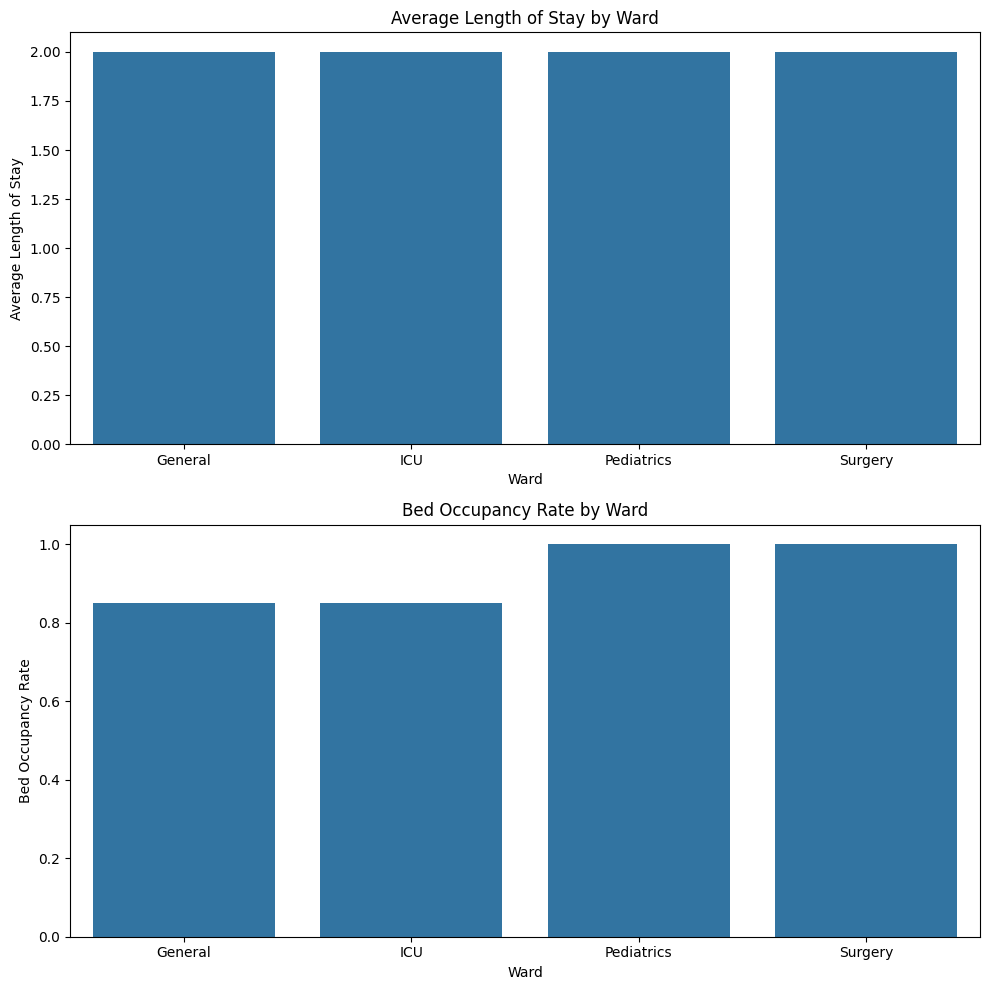

In [13]:
# Plot bed occupancy and average stay metrics
#combines multiple subplots for comparison between stay length and occupancy
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
sns.barplot(x='ward', y='length_of_stay', data=avg_length_of_stay_by_ward, ax=ax[0])
ax[0].set_title('Average Length of Stay by Ward')
ax[0].set_xlabel('Ward')
ax[0].set_ylabel('Average Length of Stay')

sns.barplot(x='ward', y='bed_occupancy_rate', data=bed_occupancy, ax=ax[1])
ax[1].set_title('Bed Occupancy Rate by Ward')
ax[1].set_xlabel('Ward')
ax[1].set_ylabel('Bed Occupancy Rate')

plt.tight_layout()
plt.show()